In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#  Load the ARIMA model, test data, and train data
model_fit = ARIMAResults.load("/Users/thyag/Desktop/projects/eloctrocute/model_parms/arima_model.pkl")
test_data = pd.read_csv("/Users/thyag/Desktop/projects/eloctrocute/sample_data/test_data.csv")
train_data = pd.read_csv("/Users/thyag/Desktop/projects/eloctrocute/sample_data/train_data.csv")

In [4]:
train_data

,Unnamed: 0,Battery_SOH
0,2023-01-01,99.621735
1,2023-01-02,100.225259
2,2023-01-03,100.536247
3,2023-01-04,100.158840
4,2023-01-05,99.342589
...,...,...
195,2023-07-15,86.648402
196,2023-07-16,86.468379
197,2023-07-17,85.987136
198,2023-07-18,86.025440


In [6]:
# Make predictions on test data
n_forecast = len(test_data)
forecast_results = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast_results.predicted_mean

# Get confidence intervals
confidence_intervals = forecast_results.conf_int() 
confidence_intervals

,lower Battery_SOH,upper Battery_SOH
2023-07-20,85.227988,86.656674
2023-07-21,85.125931,86.680972
2023-07-22,85.037928,86.786739
2023-07-23,84.957374,86.863234
2023-07-24,84.883505,86.938031
2023-07-25,84.814481,87.006843
2023-07-26,84.749588,87.071785
2023-07-27,84.688125,87.133236
2023-07-28,84.629610,87.191754
2023-07-29,84.573653,87.247710


In [7]:
# Make sure forecast index aligns with test data index for plotting/evaluation
forecast_values.index = test_data.index
confidence_intervals.index = test_data.index
print(forecast_values.head())
print(confidence_intervals.head())

0    85.942331
1    85.903451
2    85.912333
3    85.910304
4    85.910768
Name: predicted_mean, dtype: float64
   lower Battery_SOH  upper Battery_SOH
0          85.227988          86.656674
1          85.125931          86.680972
2          85.037928          86.786739
3          84.957374          86.863234
4          84.883505          86.938031


In [17]:
# Calculate evaluation metrics
actual_values = test_data['Battery_SOH']
actual_values

0     85.981196
1     86.196443
2     85.523882
3     85.880314
4     85.479323
5     85.309638
6     85.424291
7     85.054527
8     85.107505
9     84.822537
10    85.679418
11    85.008479
12    84.695682
13    84.877294
14    84.686702
15    84.561209
16    84.718650
17    84.668352
18    84.188450
19    84.081155
20    84.077484
21    83.375324
22    83.517043
23    84.287162
24    84.275890
25    83.612789
26    83.765367
27    83.590475
28    84.325264
29    83.641772
30    83.171625
31    82.827238
32    82.535666
33    82.982139
34    82.597495
35    82.300824
36    82.436428
37    82.208636
38    82.941742
39    82.602392
40    82.237608
41    82.585883
42    82.066810
43    81.686715
44    82.303337
45    81.909173
46    81.337226
47    81.491998
48    81.186915
49    80.935060
Name: Battery_SOH, dtype: float64

In [18]:
forecast_values

0     85.942331
1     85.903451
2     85.912333
3     85.910304
4     85.910768
5     85.910662
6     85.910686
7     85.910681
8     85.910682
9     85.910682
10    85.910682
11    85.910682
12    85.910682
13    85.910682
14    85.910682
15    85.910682
16    85.910682
17    85.910682
18    85.910682
19    85.910682
20    85.910682
21    85.910682
22    85.910682
23    85.910682
24    85.910682
25    85.910682
26    85.910682
27    85.910682
28    85.910682
29    85.910682
30    85.910682
31    85.910682
32    85.910682
33    85.910682
34    85.910682
35    85.910682
36    85.910682
37    85.910682
38    85.910682
39    85.910682
40    85.910682
41    85.910682
42    85.910682
43    85.910682
44    85.910682
45    85.910682
46    85.910682
47    85.910682
48    85.910682
49    85.910682
Name: predicted_mean, dtype: float64

In [19]:
# Calculate Metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print metrics
print("\n--- Forecast Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE):  {mae:.3f}")
print(f"Mean Squared Error (MSE):   {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


--- Forecast Evaluation Metrics ---
Mean Absolute Error (MAE):  2.229
Mean Squared Error (MSE):   6.871
Root Mean Squared Error (RMSE): 2.621


In [25]:
# Make sure forecast index aligns with test data index for plotting/evaluation
last_train_index = train_data.index[-1]
new_index = pd.RangeIndex(start=last_train_index + 1, stop=last_train_index + 1 + n_forecast)

test_data.index = new_index
forecast_values.index = new_index
confidence_intervals.index = new_index

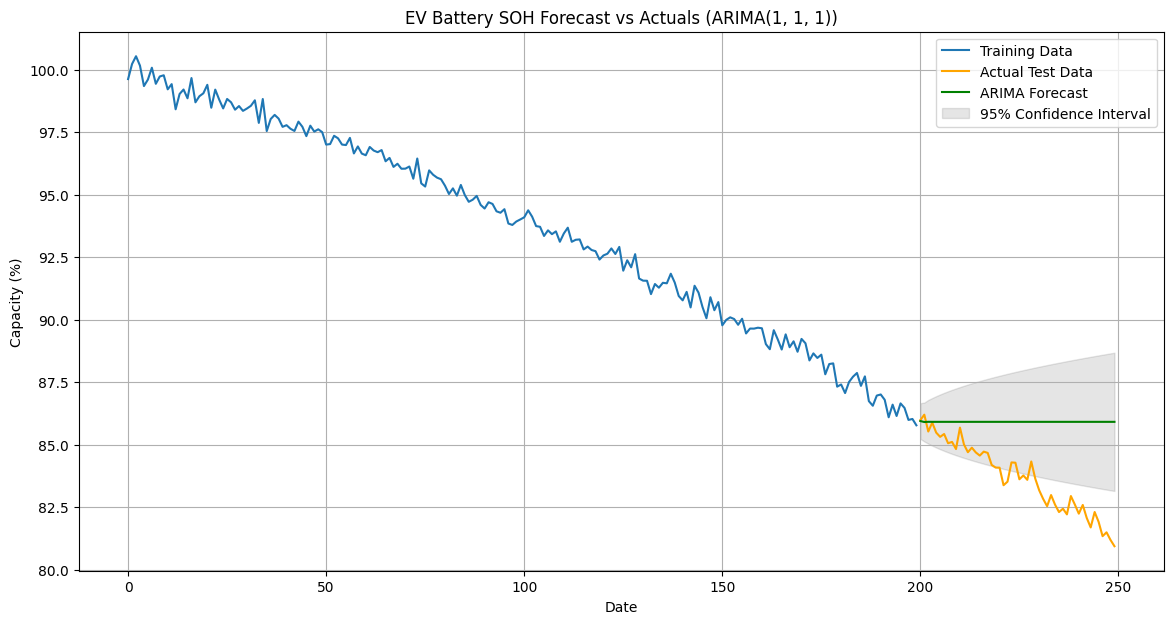

In [26]:
# --- Visualize the Forecast vs Actuals ---
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Battery_SOH'], label='Training Data')
plt.plot(test_data.index, actual_values, label='Actual Test Data', color='orange')
plt.plot(forecast_values.index, forecast_values, label='ARIMA Forecast', color='green')

# Plot confidence intervals
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0], # lower bound
                 confidence_intervals.iloc[:, 1], # upper bound
                 color='k', alpha=0.1, label='95% Confidence Interval')

plt.title(f'EV Battery SOH Forecast vs Actuals (ARIMA{model_fit.model.order})')
plt.xlabel('Date')
plt.ylabel('Capacity (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Model is too simple and ARIMA(1, 1, 1) is not enough to capture the underlying patterns in the data.